# Finding issues in consensus sequences

All functions in this notebook will be available after version 0.1.12! 

After building the consensus sequences using `Verkko`, some assembly errors may remain, such as switching errors. Some of these errors can be corrected by revisiting the graph and identifying incorrect paths. However, the difference in data formats between the final consensus FASTA and the graph makes this step challenging. The final consensus sequence is in FASTA format and is not homopolymer-compressed(HPC), unlike the graph. In this Jupyter notebook, we provide a way to convert the coordinates of a region of interest from the FASTA sequence to the corresponding nodes in the graph, and vice versa.

In [7]:
import verkkofillet as vf

## Trace back from un-HPC sequence to corresponding nodes in HPC graph

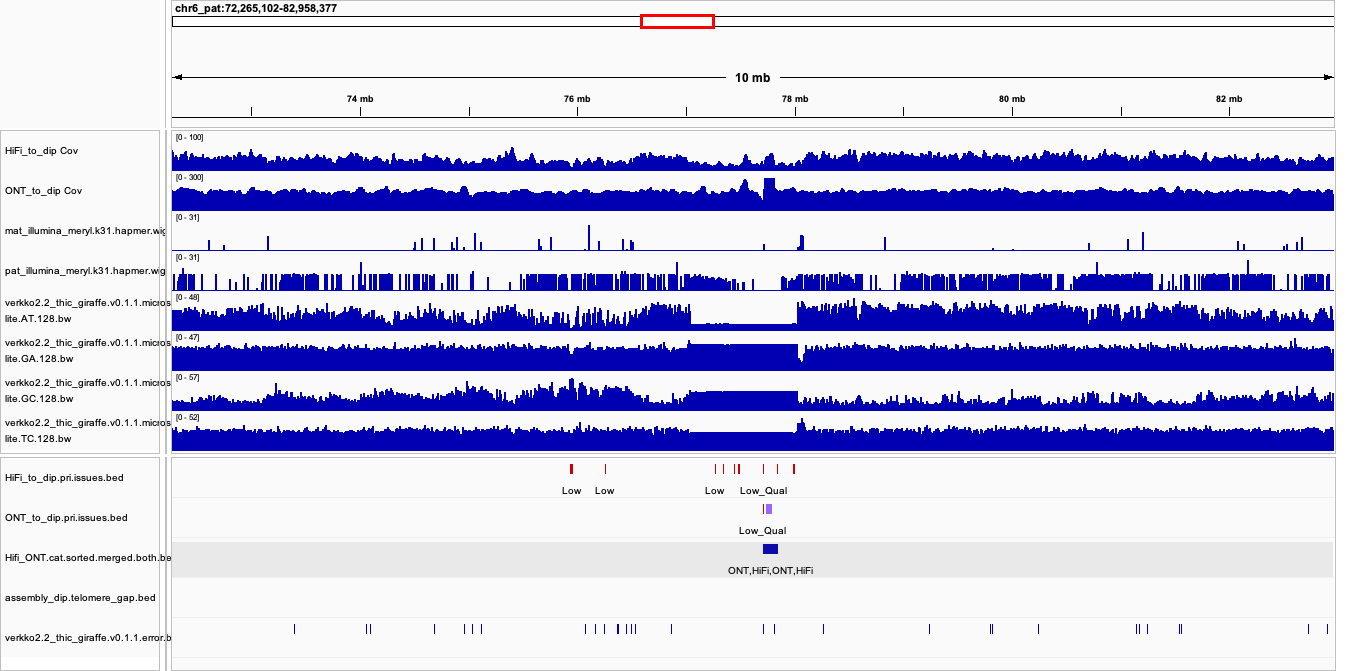

In [18]:
display(Image(filename="../image/igv_snapshot.png",width=1200))

Here is an example on chr6_pat in Giraffe, shown in the middle of the IGV screenshot. Both alignment patterns have issues. Let's identify which nodes are involved in this region and check if it is one of the regions where we filled a gap.

We use a BED file containing all the intersected issues from both HiFi and ONT alignments. For more details, you can check [marbl training material](https://github.com/marbl/training/tree/main/part3-evaluate). Additionally, we will add padding regions at both ends of each region in the BED file.

In [ ]:
# issue region
bed_file = "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/issues/Hifi_ONT.cat.sorted.merged.both.bed"
fai = "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet/assembly_trimmed_flipped_rename_sortedhap.fasta.fai"

vf.tl.addPadding_to_bed(bed_file , fai, force = True)

Force mode is enabled. Existing output files will be overwritten.
Saving padded BED file to /path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/issues/Hifi_ONT.cat.sorted.merged.both.pad_10000.bed, with adding 10000 padding to the start and end positions.


Next, we will generate a JSON map file linking the coordinates between the un-HPC FASTA and the HPC FASTA. This process is performed using the following command and may take a long time to complete:

In [ ]:
# input 
uncomp_fasta = "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet/assembly_trimmed_flipped_rename_sortedhap.fasta"

# output
mapJson_file = "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/findNodes/map.json"

vf.tl.build_sparse_compression_map(uncomp_fasta, mapJson_file=mapJson_file)

`build_sparse_compression_map` will generate a map.json file, which will be used in the next step to liftover the regions. 
By default, the output file name has the same name as the input FASTA file with the suffix `.map.json`. If you want to specify a custom file name, you can do so manually.
For the BED file, this step may take a long time, so it is recommended to filter for regions of interest. Here, we have filtered only the primary contigs.

In [ ]:
# input
uncomp_bed= "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/issues/Hifi_ONT.cat.sorted.merged.both.pad_10000.filtered.bed"

# output
comp_bed= "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/issues/Hifi_ONT.cat.sorted.merged.both.pad_10000.filtered.comp.bed"

vf.tl.lift_seqs(uncomp_fasta, mapJson_file, uncomp_bed)

After lifting over to HPC coordinates, the regions in the BED file can be processed using `vf.pp.bed_to_regionList` function.
This function returns a list of regions, where The list follows the format: 'chr:start-end'

In [10]:
regions_list = vf.pp.bed_to_regionsList(comp_bed)
regions_list[0:3]

['chr10_pat:11151143-11173573',
 'chr10_pat:31856658-31882613',
 'chr10_pat:109598646-109618946']

In [11]:
gaf_file = "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/graphaligner_assembly_dip_with_cigar.gaf"
graph_file = "/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_gapFilling/assembly.homopolymer-compressed.noseq.gfa"

finalnodes = vf.pp.getNodes_from_unHPCregion(gaf_file, graph_file, regions_list)

Finding nodes for regions: 100%|██████████| 33/33 [00:03<00:00,  8.25it/s]


In [12]:
finalnodes

region  \
0     chr10_pat:11151143-11173573   
1     chr10_pat:31856658-31882613   
2   chr10_pat:109598646-109618946   
3     chr11_mat:31486037-31517034   
4     chr11_mat:49437904-50014607   
5     chr11_mat:50043039-50190314   
6     chr11_mat:50240589-50617374   
7     chr11_mat:69244526-69384148   
8     chr11_pat:48869998-49226786   
9     chr11_pat:49858668-50032389   
10    chr11_pat:68132626-68264115   
11    chr13_pat:31715512-31790695   
12      chr14_mat:6130950-6155055   
13      chr14_mat:9138326-9492178   
14      chr14_mat:9662828-9832934   
15     chr14_mat:9843378-10548750   
16      chr14_pat:8194836-8383018   
17     chr1_pat:78598923-78642225   
18     chr1_pat:79628125-79719470   
19       chr4_pat:1340596-1361213   
20   chr5_mat:131675494-131697701   
21     chr6_pat:54815981-54929325   
22       chr7_mat:3001574-3021474   
23     chr7_mat:45803055-45832666   
24     chr8_pat:28722405-28781934   
25     chr8_pat:48171912-48377627   
26     chr9_mat:39536594-39593470   
27     chr9_mat:57607624-57659167   
28     chr9_mat:57680824-57761812   
29     chr9_pat:39387663-39442148   
30     chr9_pat:58618440-58760537   
31   chrX_mat:104327434-104347024   
32         chrY_pat:616197-636568   

                                                nodes  
0                                        [utig4-2061]  
1       [utig4-487, utig4-482, utig4-484, utig4-1849]  
2                                         [utig4-291]  
3                                         [utig4-564]  
4   [utig4-98, utig4-99, utig4-96, utig4-100, utig...  
5                  [utig4-2421, utig4-495, utig4-100]  
6                             [utig4-2421, utig4-495]  
7   [utig4-1083, utig4-334, utig4-331, utig4-1087,...  
8                                          [utig4-69]  
9                             [utig4-2421, utig4-496]  
10  [utig4-1084, utig4-334, utig4-331, utig4-1088,...  
11   [utig4-1437, utig4-1439, utig4-1442, utig4-2673]  
12                                          [utig4-5]  
13                    [utig4-207, utig4-210, utig4-5]  
14                                        [utig4-151]  
15                           [utig4-1729, utig4-1730]  
16   [utig4-2737, utig4-2725, utig4-2732, utig4-2748]  
17               [utig4-1751, utig4-1750, utig4-1997]  
18               [utig4-1575, utig4-1576, utig4-1574]  
19                                       [utig4-1638]  
20                                       [utig4-2460]  
21                           [utig4-2329, utig4-2651]  
22                                          [utig4-1]  
23       [utig4-49, utig4-2498, utig4-45, utig4-2499]  
24               [utig4-2469, utig4-2198, utig4-2199]  
25                           [utig4-2514, utig4-2516]  
26     [utig4-2208, utig4-460, utig4-2210, utig4-459]  
27   [utig4-2295, utig4-1366, utig4-1365, utig4-2297]  
28               [utig4-1578, utig4-1366, utig4-1365]  
29     [utig4-2208, utig4-460, utig4-2210, utig4-459]  
30  [utig4-1578, utig4-2295, utig4-1583, utig4-158...  
31                                       [utig4-1999]  
32                                       [utig4-1627]

In the example above, the region `chr6_pat:54815981-54929325` is matched with `[utig4-2329, utig4-2651]`. We can observe that this region is one of the manually gap-filled regions where we introduced new nodes to the graph to connect unconnected nodes using ONT reads.

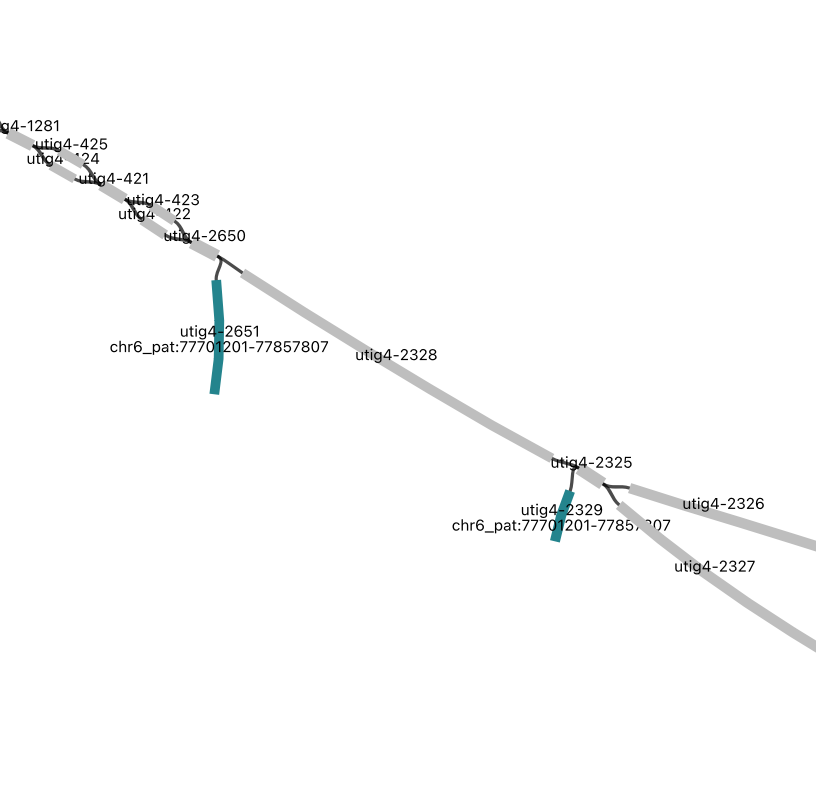

In [19]:
display(Image(filename="../image/graphchr6.png",width=500))

Now, you can save the `finalnodes` DataFrame locally to use it in the next step.
Alternatively, we can use the `vf.tl.make_bandage_csv` function to create a CSV file that can be used in Bandage to visualize the final nodes.
The final file will have the following columns:

* `node`: Node name
* `uncomp`: Position of the node in the uncompressed FASTA
* `comp`: Position of the node in the compressed FASTA

In [ ]:
vf.tl.make_bandage_csv(finalnodes, uncomp_bed, comp_bed, force = True)

Force mode is enabled. Existing output files will be overwritten.
writing to /path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/issues/Hifi_ONT.cat.sorted.merged.both.pad_10000.filtered.comp.csv
